In [180]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

In [145]:
I_ = 0; J_ = 0; K_= 0;

def bounding_box():
    ax.plot([(I_),(I_+1)], [(J_),(J_)], [(K_),(K_)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_+1)], [(J_+1),(J_+1)],     [(K_+1),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_+1)], [(J_),(J_)], [(K_+1),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_+1)], [(J_+1),(J_+1)],     [(K_),(K_)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_)], [(J_),(J_+1)], [(K_),(K_)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_+1),(I_+1)], [(J_),(J_+1)],     [(K_+1),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_+1),(I_+1)], [(J_),(J_+1)],     [(K_),(K_)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_)], [(J_),(J_+1)], [(K_+1),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_)], [(J_),(J_)],[(K_),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_+1),(I_+1)], [(J_+1),(J_+1)],       [(K_),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_+1),(I_+1)], [(J_),(J_)],   [(K_),(K_+1)], color = [0,0,0], alpha=0.1)
    ax.plot([(I_),(I_)], [(J_+1),(J_+1)],   [(K_),(K_+1)], color = [0,0,0], alpha=0.1)
    
def draw_axi():
    ax.quiver((I_+0.01), (J_+0.01), (K_+0.01), 0.1, 0., 0., color = 'r')
    ax.quiver((I_+0.01), (J_+0.01), (K_+0.01), 0., 0.1, 0., color = 'g')
    ax.quiver((I_+0.01), (J_+0.01), (K_+0.01), 0., 0., 0.1, color = 'b')
    
#line segment /edges of cube
seg = [[[0,0,0],[0,0,1]],[[0,0,0],[0,1,0]],
       [[0,0,0],[1,0,0]],[[1,1,0],[1,1,1]],[[0,1,1],[1,1,1]],
       [[1,0,1],[1,1,1]],[[1,0,0],[1,0,1]],[[1,0,0],[1,1,0]],
       [[0,1,0],[0,1,1]],[[0,1,0],[1,1,0]],[[0,0,1],[1,0,1]],
       [[0,0,1],[0,1,1]]] ;



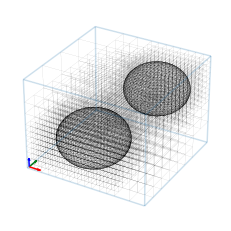

In [207]:
###################
##  EDGES cells and facets#######

#streams
imgfile = "partition.png" #output .png

#fig handle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def _j(i,N):
    return ((i+1)%N)

#colormap
cmap=plt.get_cmap('tab10')  #Only 10 distict colors

#input facets data
file = "facets.dat" #input
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#Edges of facets
edgest = [];
for ir in range(r):
    for ic in range(3):
        jc = _j(ic,3);
        pointA = []; pointB = []
        for k in range(3):
            pointA.append(dat[ir,3*ic+k])
            pointB.append(dat[ir,3*jc+k])
        edgest.append([pointA,pointB])
et = Line3DCollection(edgest, linewidth = 0.1, color = [0,0,0], norm=plt.Normalize(0, n), alpha = 0.5)
ax.add_collection3d(et) 

#input cells data
file = "cells.dat" #input
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#edges of cells
edgesc = [];
for ir in range(r):
    for ic in range(4):
        jc = _j(ic,4);
        pointA = []; pointB = []
        for k in range(3):
            pointA.append(dat[ir,3*ic+k])
            pointB.append(dat[ir,3*jc+k])
        edgesc.append([pointA,pointB])
ec = Line3DCollection(edgesc, linewidth = 0.1, color = [0,0,0], norm=plt.Normalize(0, n), alpha = 0.1)
ax.add_collection3d(ec) 

#Bounding box edges
lc = Line3DCollection(seg, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0, n), alpha = 0.2)
ax.add_collection3d(lc) 

#plot and save
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.axis('off')  #swtch of axis
plt.grid(b=None) # swithc of grid
draw_axi();
#ax.view_init(0, 90)
plt.savefig(imgfile, dpi=600)

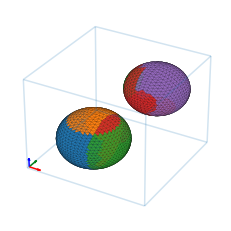

In [208]:
##########################
##  facets colored #######

#streams
file = "facets.dat" #input
imgfile = "partitione.png" #output .png

#fig handle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colormap
cmap=plt.get_cmap('tab10')  #Only 10 distict colors

#input facets data
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#facets
poly3d = [[dat[ir,3*ic:3*(ic+1)] for ic in range(3)] for ir in range(r)]
facets = Poly3DCollection(poly3d, linewidths=.1, alpha=0.9)
facets.set_facecolor([cmap(int(dat[ir,9])) for ir in range(r)])            #facecolor
facets.set_edgecolor([0.,0.,0.])                                           #edgecolor
ax.add_collection3d(facets)  

#Boundign box
lc = Line3DCollection(seg, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, n), alpha = 0.2)
ax.add_collection3d(lc) 

#plot and save file
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.axis('off')  #swtch of axis
plt.grid(b=None) # swithc of grid
#bounding_box();
draw_axi();
#ax.view_init(0, 90)
plt.savefig(imgfile, dpi=600)

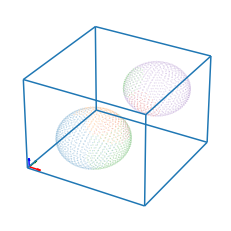

In [148]:
##########################
##  points colored #######

#streams
file = "facets.dat" #input
imgfile = "partitionp.png" #output .png

#fig handle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colormap
cmap=plt.get_cmap('tab10')  #Only 10 distict colors

#input points data
file = "points.dat" #input
dat = np.loadtxt(file).T;                                                  #read data and transpose
r,c  = np.shape(dat)
#points
col =  [cmap(int(dat[3,ir])) for ir in range(len(dat[3]))];
ax.scatter3D(dat[0], dat[1], dat[2], s=0.01, facecolor = col, marker = "o", alpha = 1.);

lc = Line3DCollection(seg, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, n))
ax.add_collection3d(lc)  

#plot and save image
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.axis('off')  #swtch of axis
plt.grid(b=None) # swithc of grid
#bounding_box();
draw_axi();
# ax.view_init(0, 90)
plt.savefig(imgfile, dpi=300)

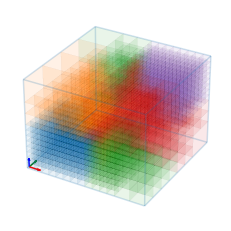

In [209]:
##########################
##  cells colored #######

#streams
file = "cells.dat" #input
imgfile = "partitionc.png" #output .png

#fig handle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colormap
cmap=plt.get_cmap('tab10')  #Only 10 distict colors

#input facets data
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#facets
poly3d = [[dat[ir,3*ic:3*(ic+1)] for ic in range(4)] for ir in range(r)]
facets = Poly3DCollection(poly3d, linewidths=.1, alpha=0.05)
facets.set_facecolor([cmap(int(dat[ir,12])) for ir in range(r)])            #facecolor
facets.set_edgecolor([0.,0.,0.])                                           #edgecolor
ax.add_collection3d(facets)  

#Boundign box
lc = Line3DCollection(seg, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, n), alpha = 0.2)
ax.add_collection3d(lc) 

#plot and save file
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.axis('off')  #swtch of axis
plt.grid(b=None) # swithc of grid
#bounding_box();
draw_axi();
#ax.view_init(0, 90)
plt.savefig(imgfile, dpi=600)

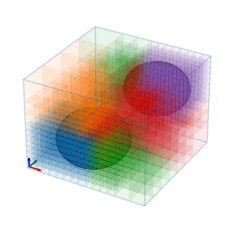

In [210]:
##########################
##  cells and facets colored #######

#streams
file = "cells.dat" #input
imgfile = "partition_all.png" #output .png

#fig handle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colormap
cmap=plt.get_cmap('tab10')  #Only 10 distict colors

#input facets data
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#facets
poly3d = [[dat[ir,3*ic:3*(ic+1)] for ic in range(4)] for ir in range(r)]
facets = Poly3DCollection(poly3d, linewidths=.1, alpha=0.05)
facets.set_facecolor([cmap(int(dat[ir,12])) for ir in range(r)])            #facecolor
facets.set_edgecolor([0.,0.,0.])                                           #edgecolor
ax.add_collection3d(facets)  

#input facets data
file = "facets.dat" #input
dat = np.loadtxt(file);
r,c  = np.shape(dat)
#facets
poly3d = [[dat[ir,3*ic:3*(ic+1)] for ic in range(3)] for ir in range(r)]
facets4 = Poly3DCollection(poly3d, linewidths=.1, alpha=0.8)
facets4.set_facecolor([cmap(int(dat[ir,9])) for ir in range(r)])            #facecolor
facets4.set_edgecolor([0.,0.,0.])                                           #edgecolor
ax.add_collection3d(facets4)  


#Boundign box
lc = Line3DCollection(seg, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, n), alpha = 0.2)
ax.add_collection3d(lc) 

#plot and save file
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.axis('off')  #swtch of axis
plt.grid(b=None) # swithc of grid
#bounding_box();
draw_axi();
#ax.view_init(0, 90)
plt.savefig(imgfile, dpi=600)

In [253]:

# Importing Image class from PIL module
from PIL import Image
 
f = "partitionc.png"
# Opens a image in RGB mode
im = Image.open(f)
  
# Setting the points for cropped image
left = 1050
top = 450
right = 2650
bottom = 2000
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
f = "_"+f
# Shows the image in image viewer
im1.save(f)

In [1]:
import sys
lo = sys.exec_prefix
print(lo)

C:\Users\kotti\anaconda3
